# A quick introduction to Hugging Face `transformers`, `datasets` and `Gradio`

This is a very quick tour through three open source libraries from Hugging Face

In [1]:
%pip install transformers datasets evaluate accelerate "rich[jupyter]" gradio --upgrade -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... 

In [2]:
!wget -O image.jpg "https://images.unsplash.com/photo-1608848461950-0fe51dfc41cb?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8Mnx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=900&q=60"

--2023-07-25 09:22:05--  https://images.unsplash.com/photo-1608848461950-0fe51dfc41cb?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8Mnx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=900&q=60
Resolving images.unsplash.com (images.unsplash.com)... 151.101.78.208, 2a04:4e42:12::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.78.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172377 (168K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>] 168.34K  --.-KB/s    in 0.03s   

2023-07-25 09:22:05 (5.67 MB/s) - ‘image.jpg’ saved [172377/172377]



In [3]:
%load_ext rich

# Using existing models

The pipeline abstraction makes it easy to treat machine learning models as any other function. Give it some input and you get some output. We can use these pipelines for many machine learning tasks.

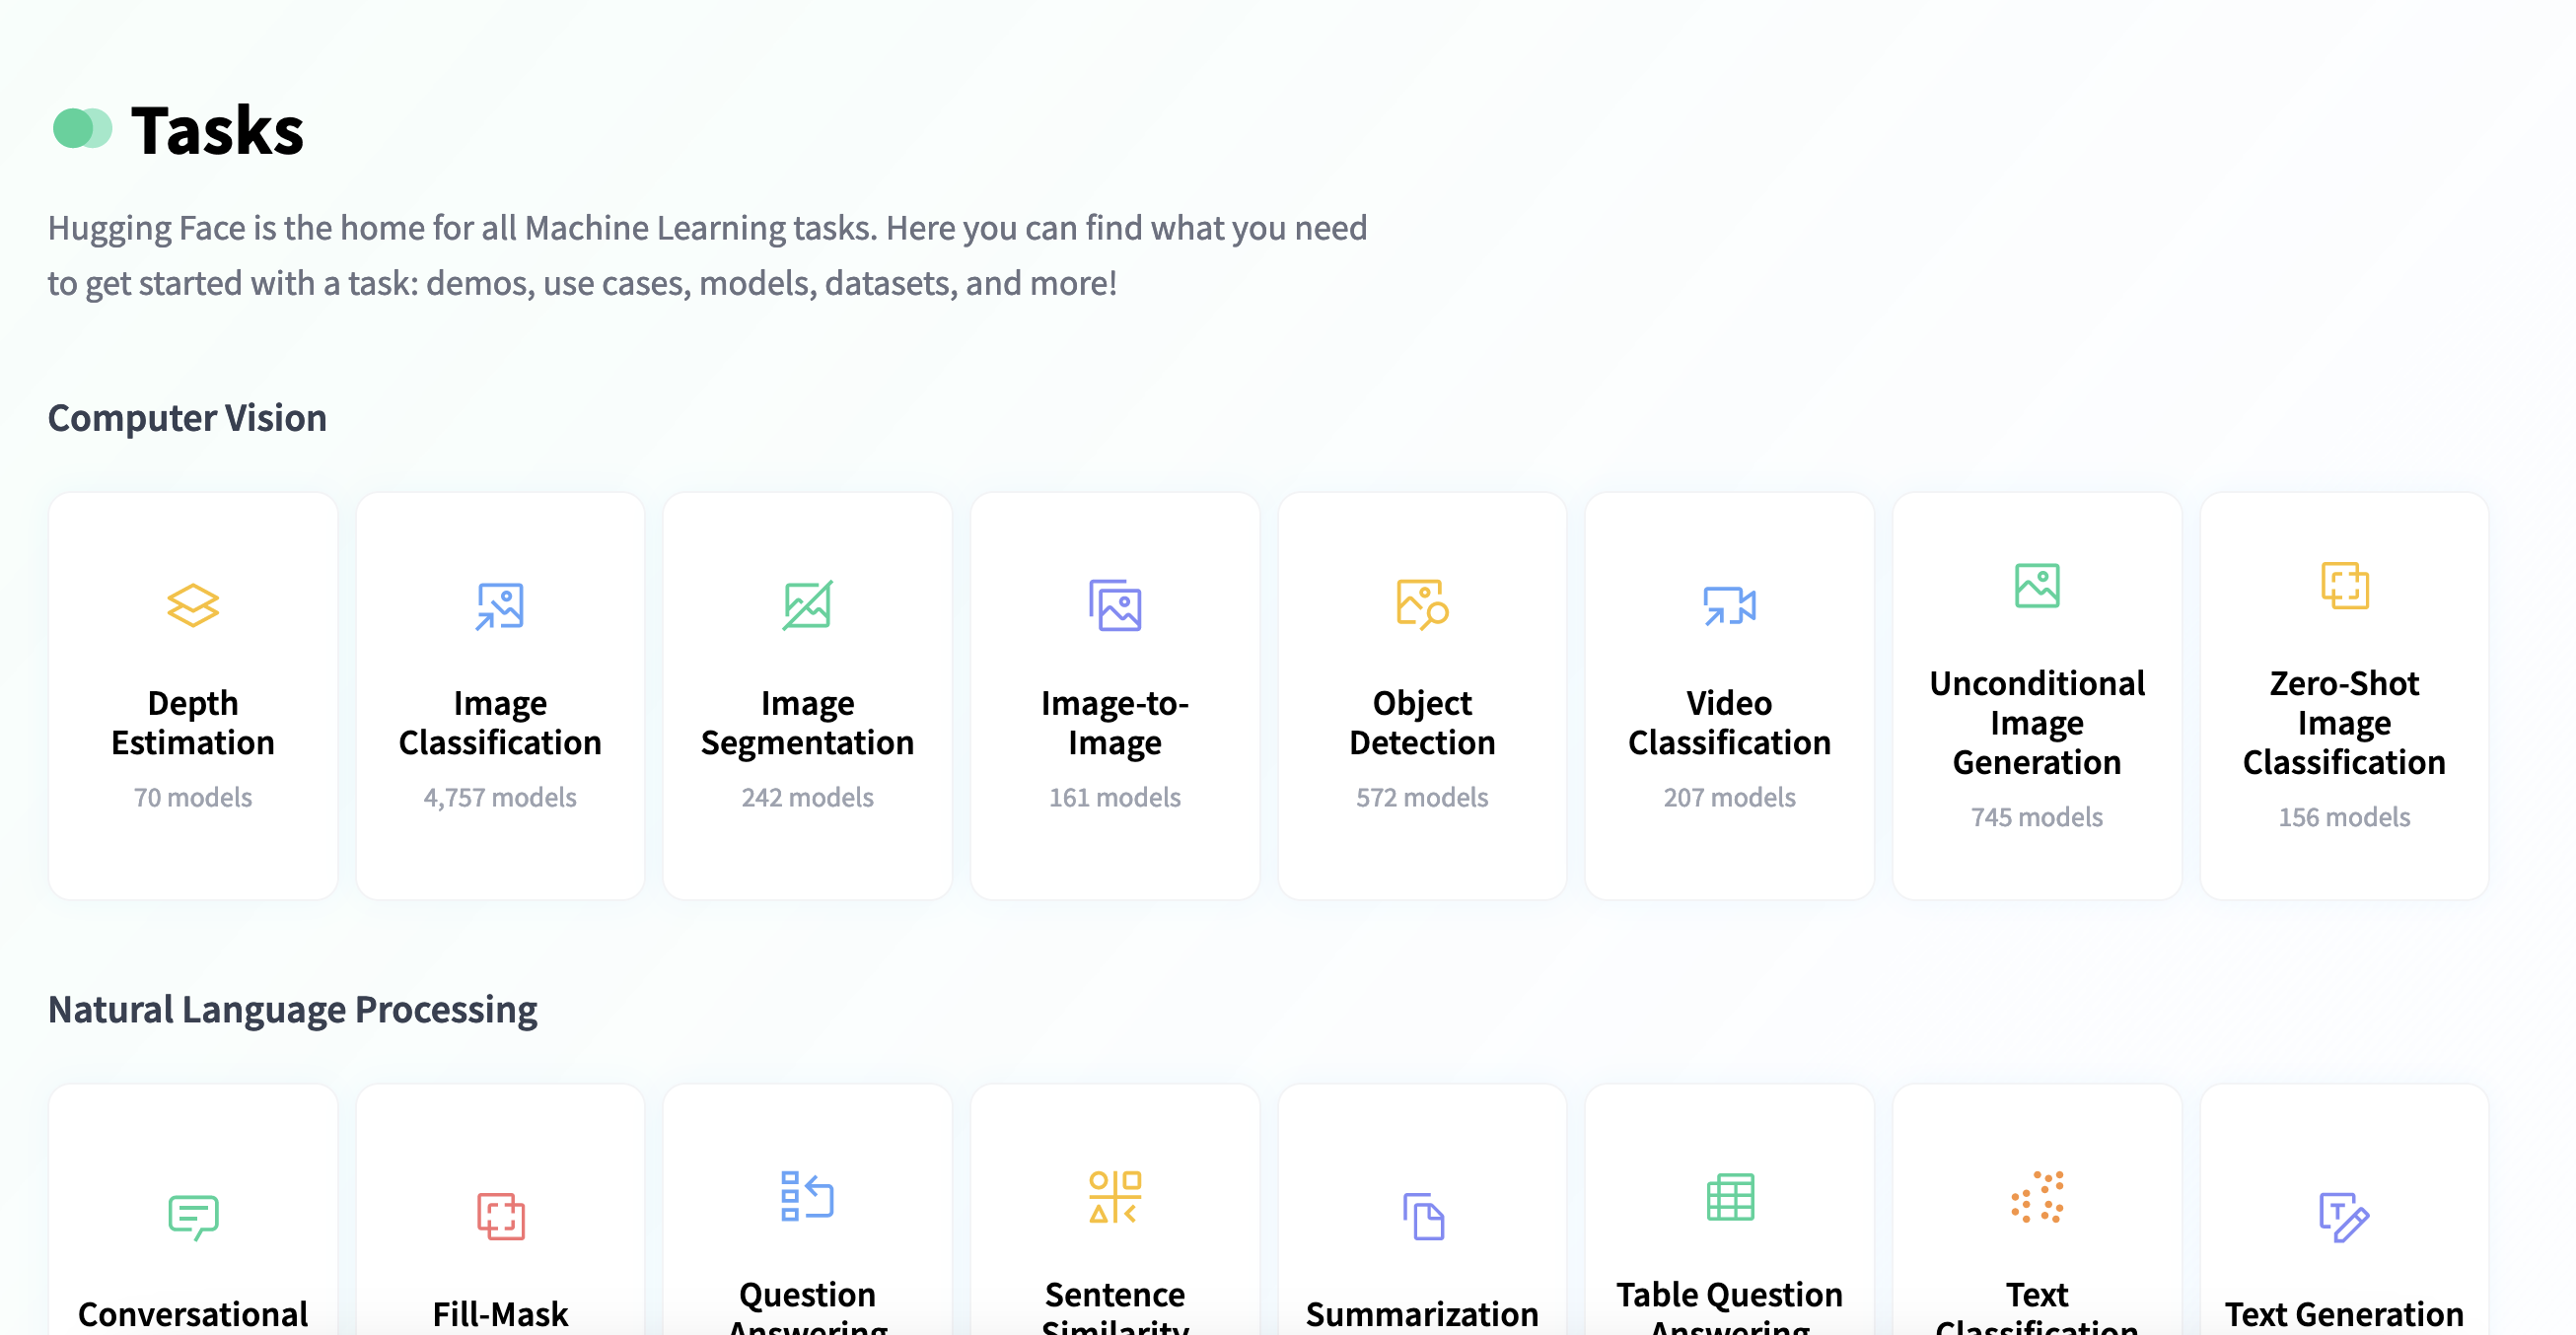

In [4]:
from transformers import pipeline

In [5]:
ner = pipeline('token-classification')

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [6]:
text = """My name is Daniel and I'm talking about open source machine learning"""

In [7]:
ner(text)

[{'entity': 'I-PER',
  'score': 0.999288,
  'index': 4,
  'word': 'Daniel',
  'start': 11,
  'end': 17}]

Let's try another task

In [8]:
sentiment = pipeline('text-classification')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [9]:
sentiment(text)

[{'label': 'POSITIVE', 'score': 0.9950340986251831}]

In [10]:
text = """The talk Daniel is giving is super bad. I'm so happy I didn't pay for this"""

In [11]:
sentiment(text)

[{'label': 'NEGATIVE', 'score': 0.9946547746658325}]

## Finding models
[https://huggingface.co/models](https://huggingface.co/models) is the main entry point to finding open source machine learning models

Filter by
- task
- language
- licence



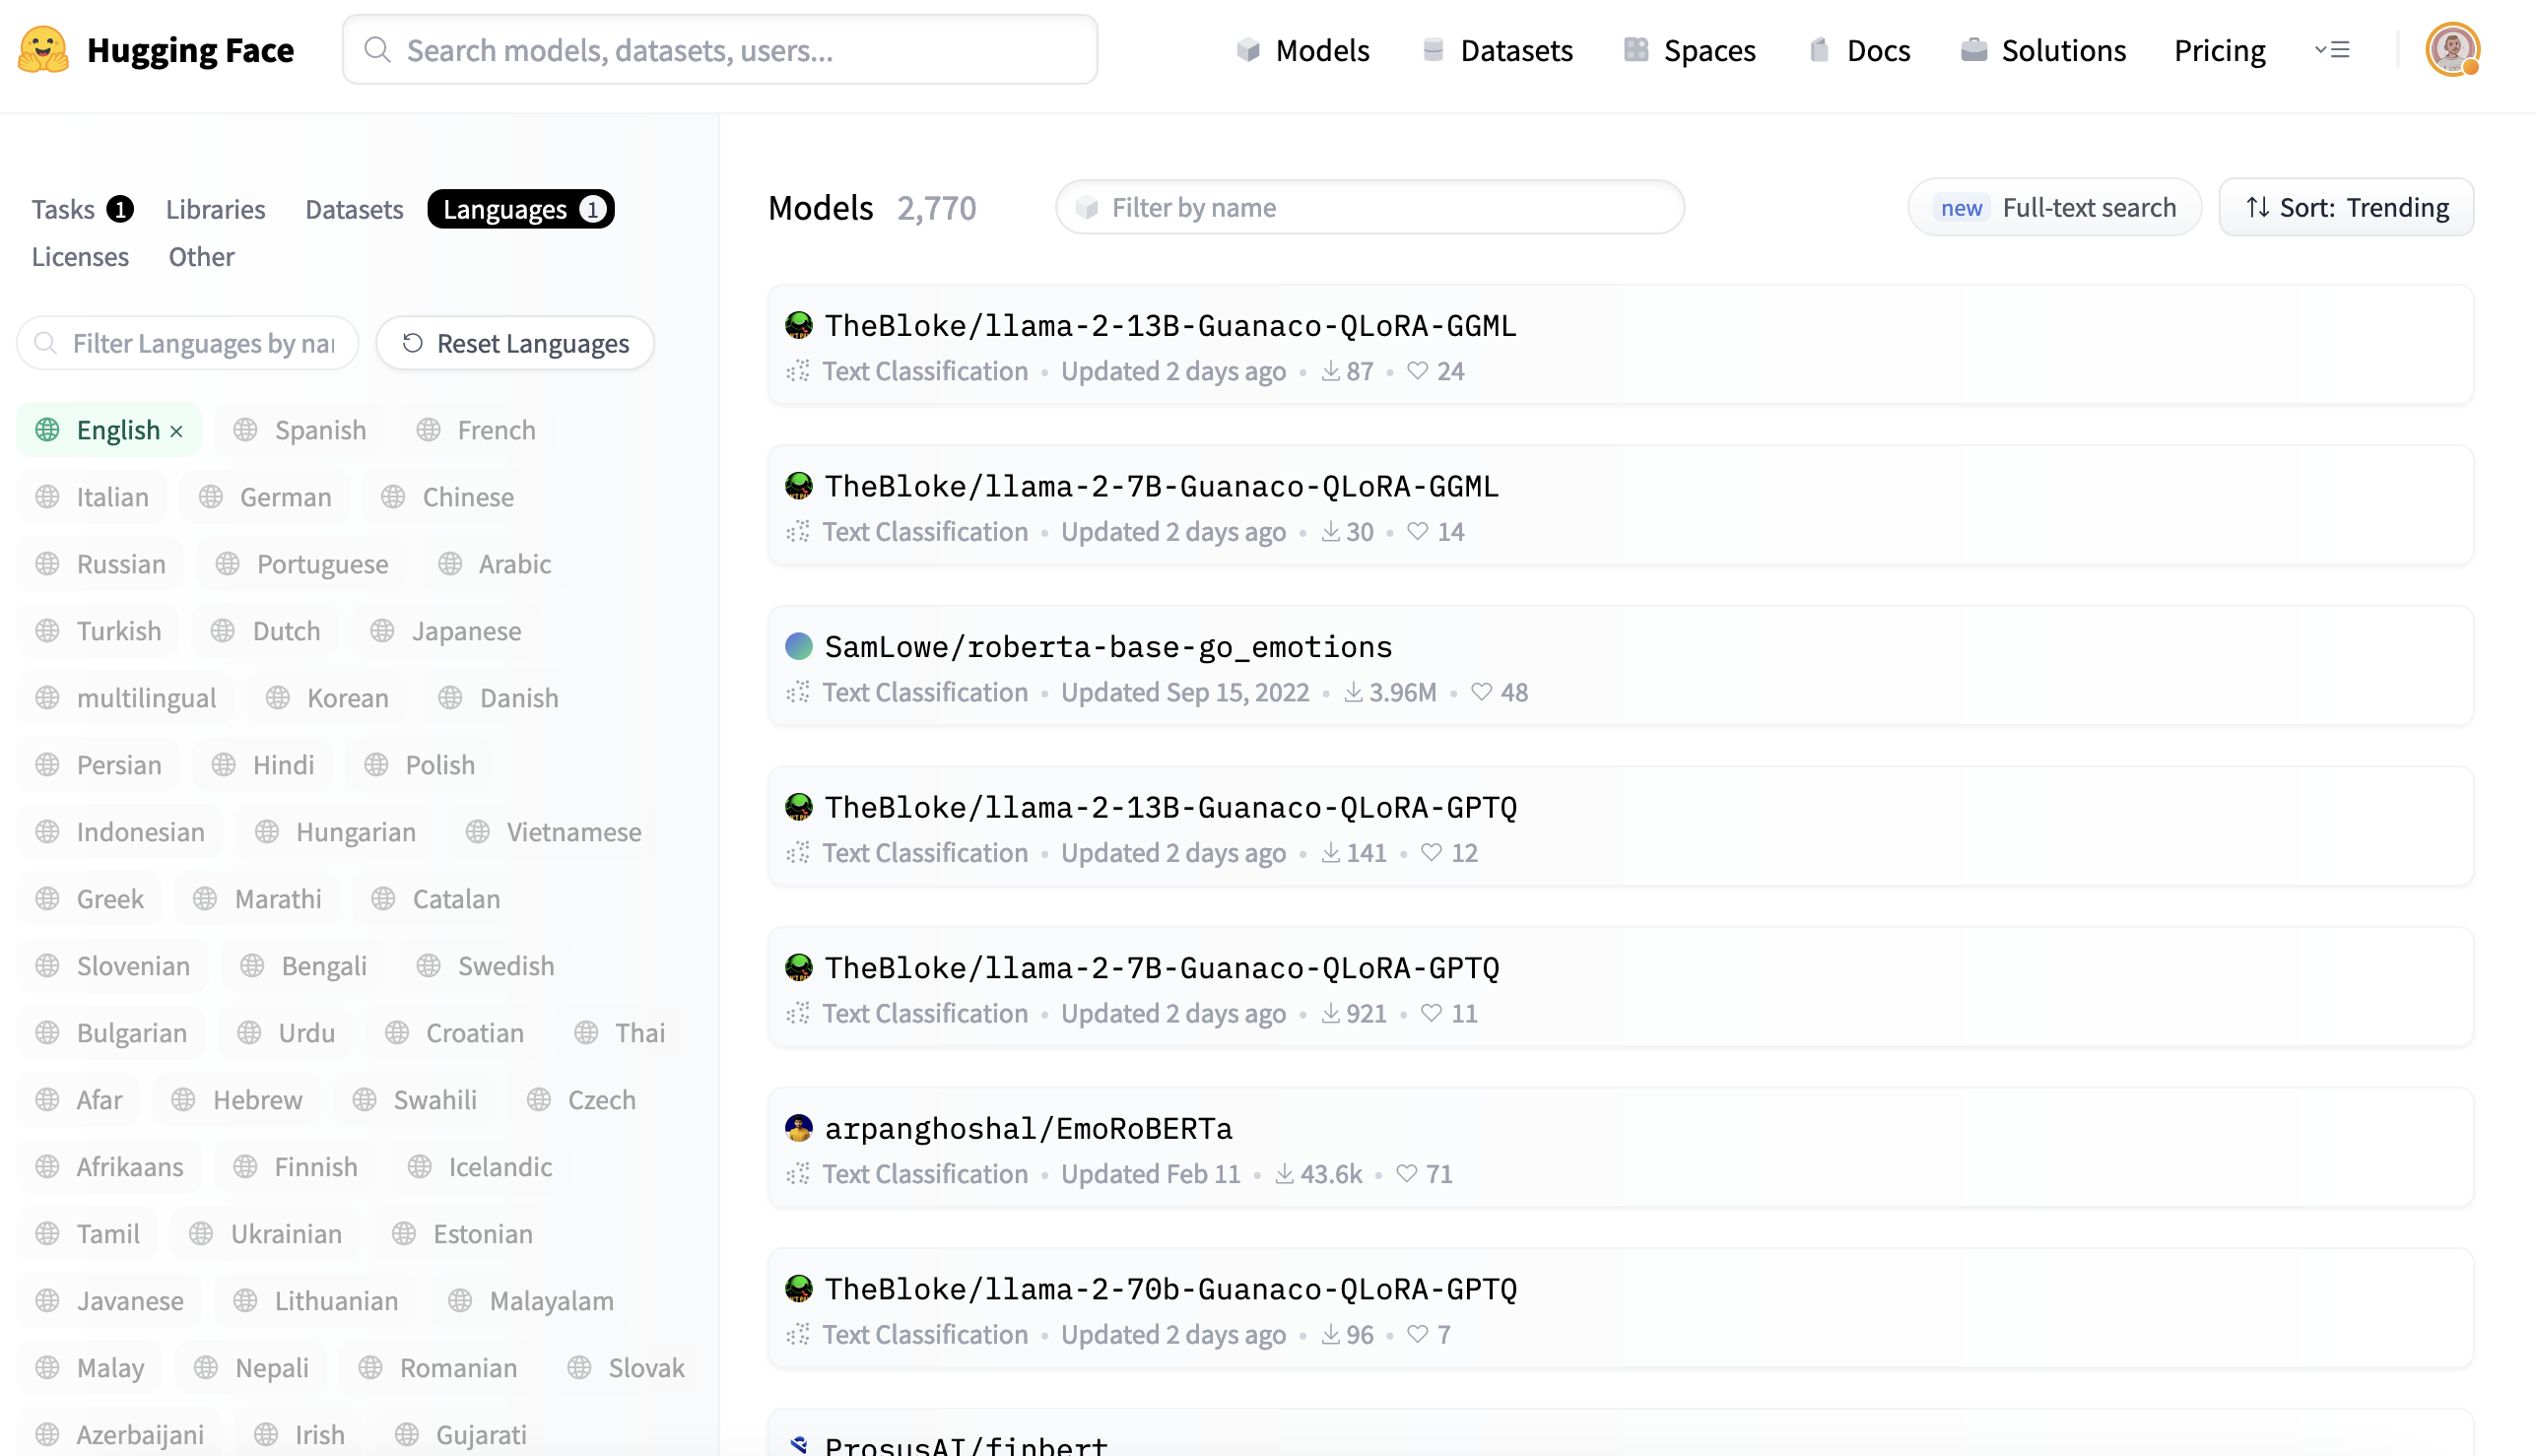

## Read the model card

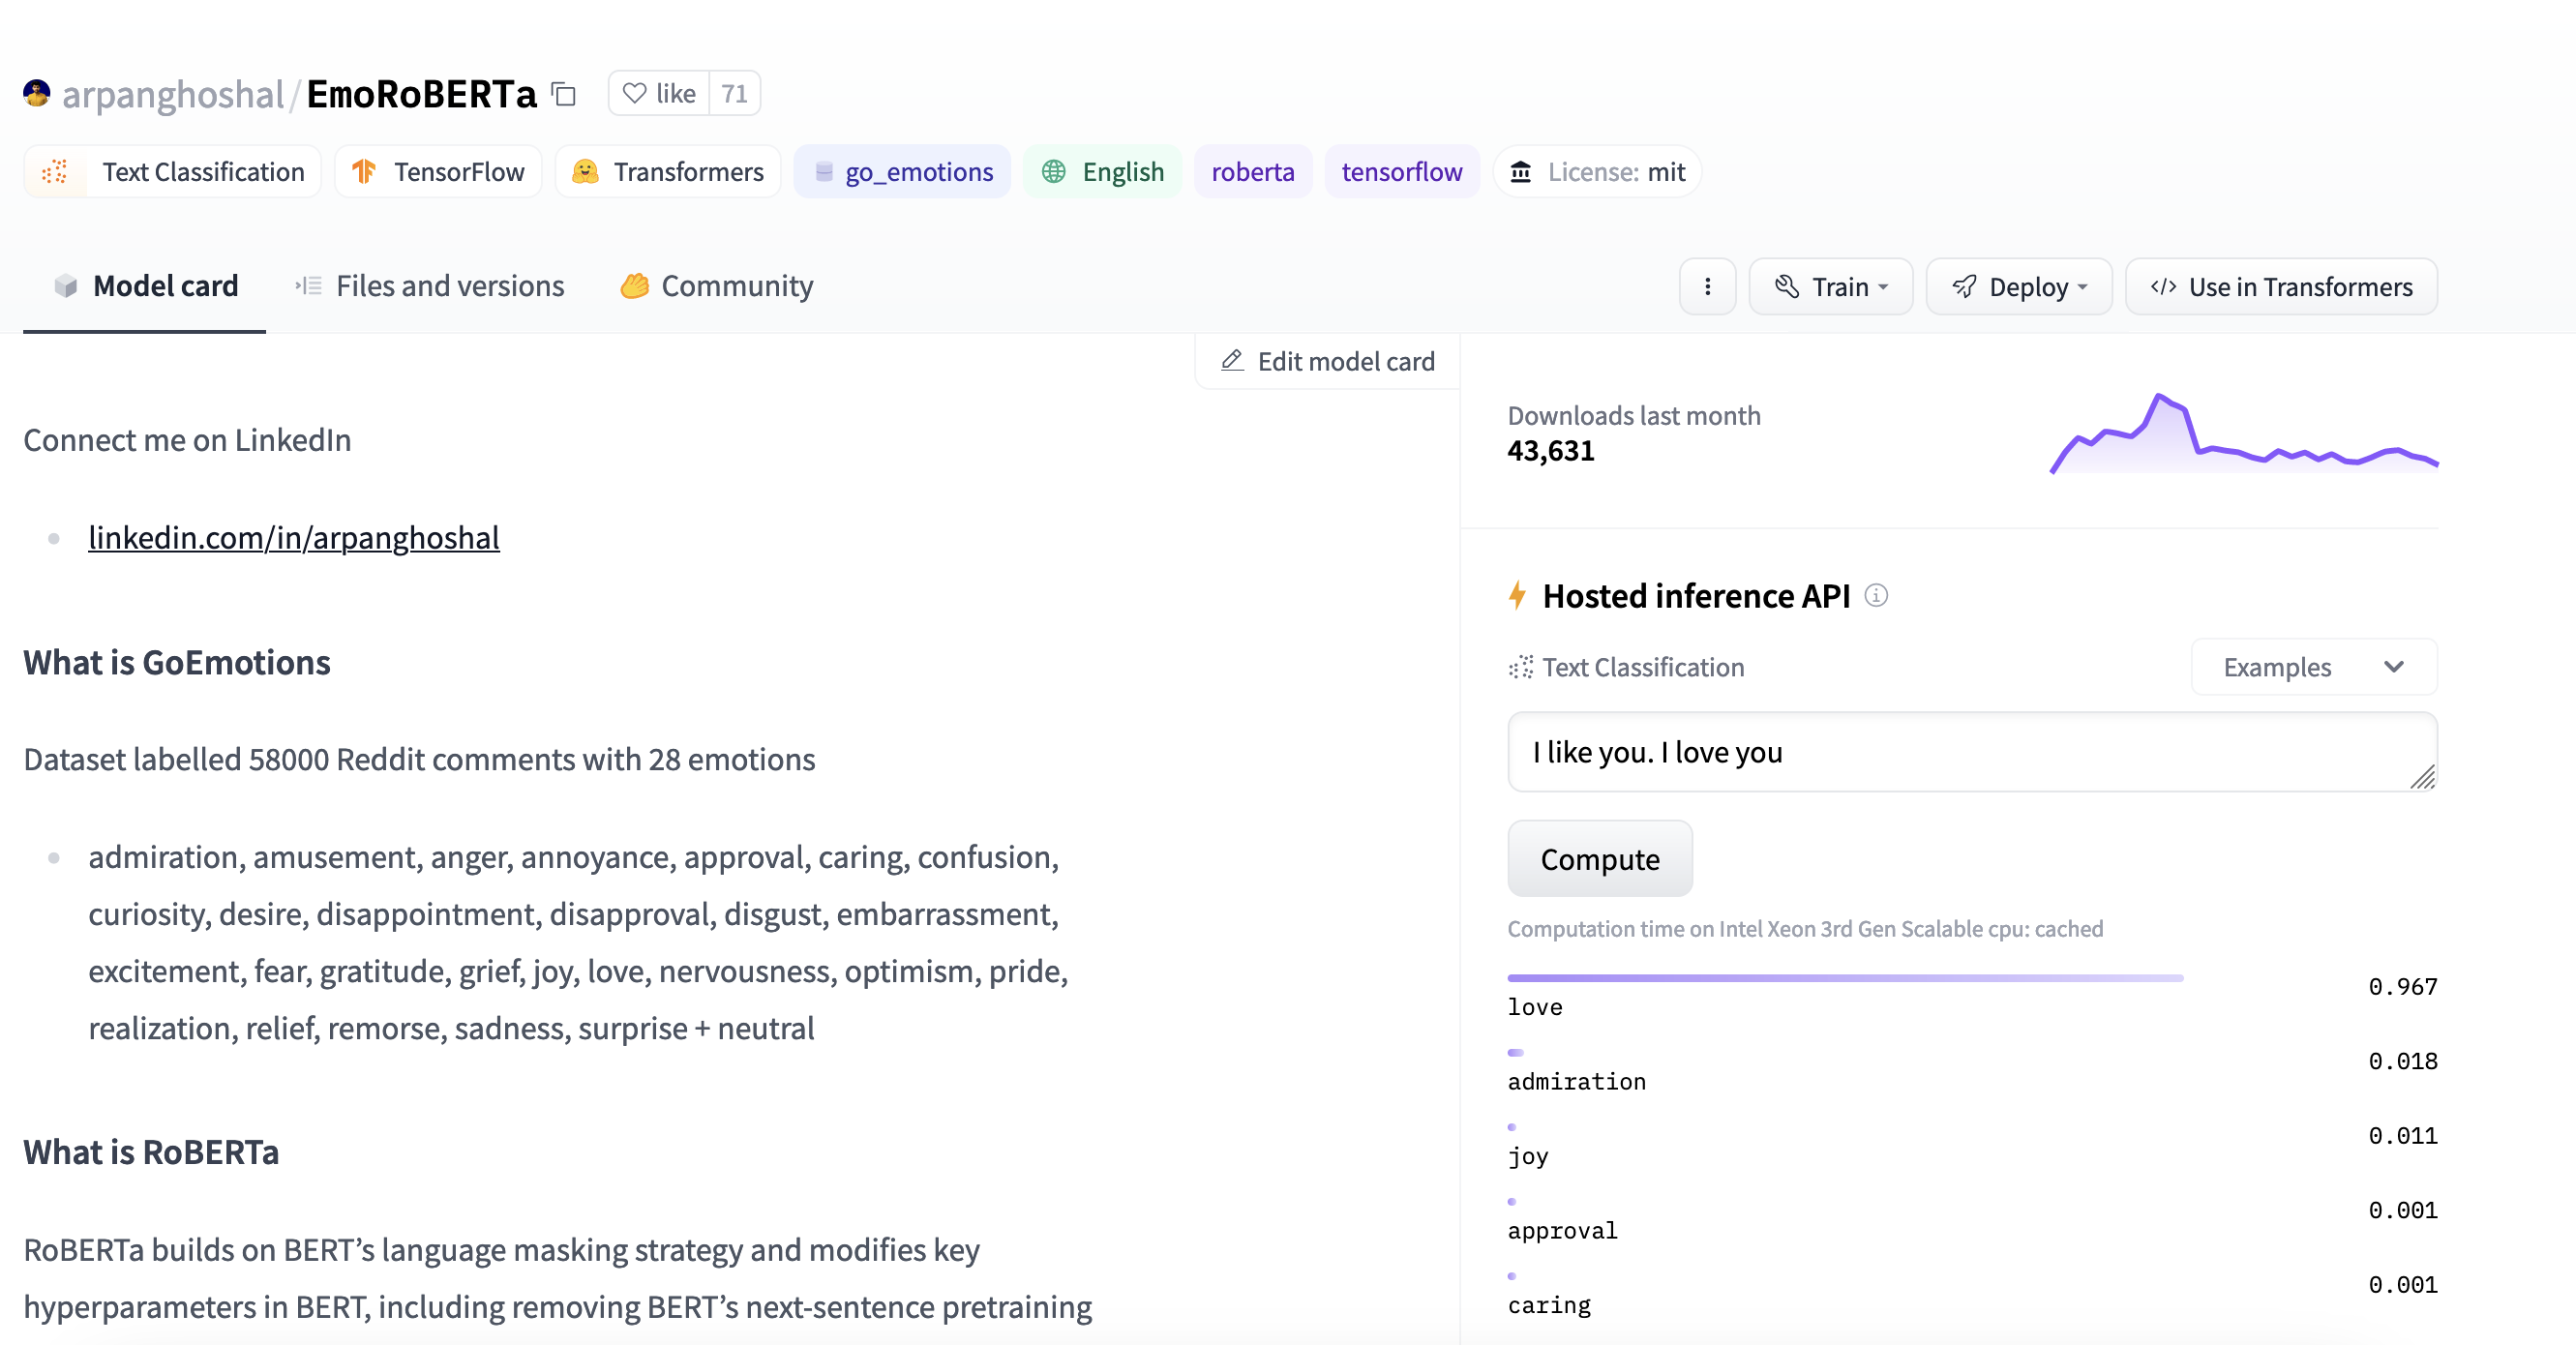

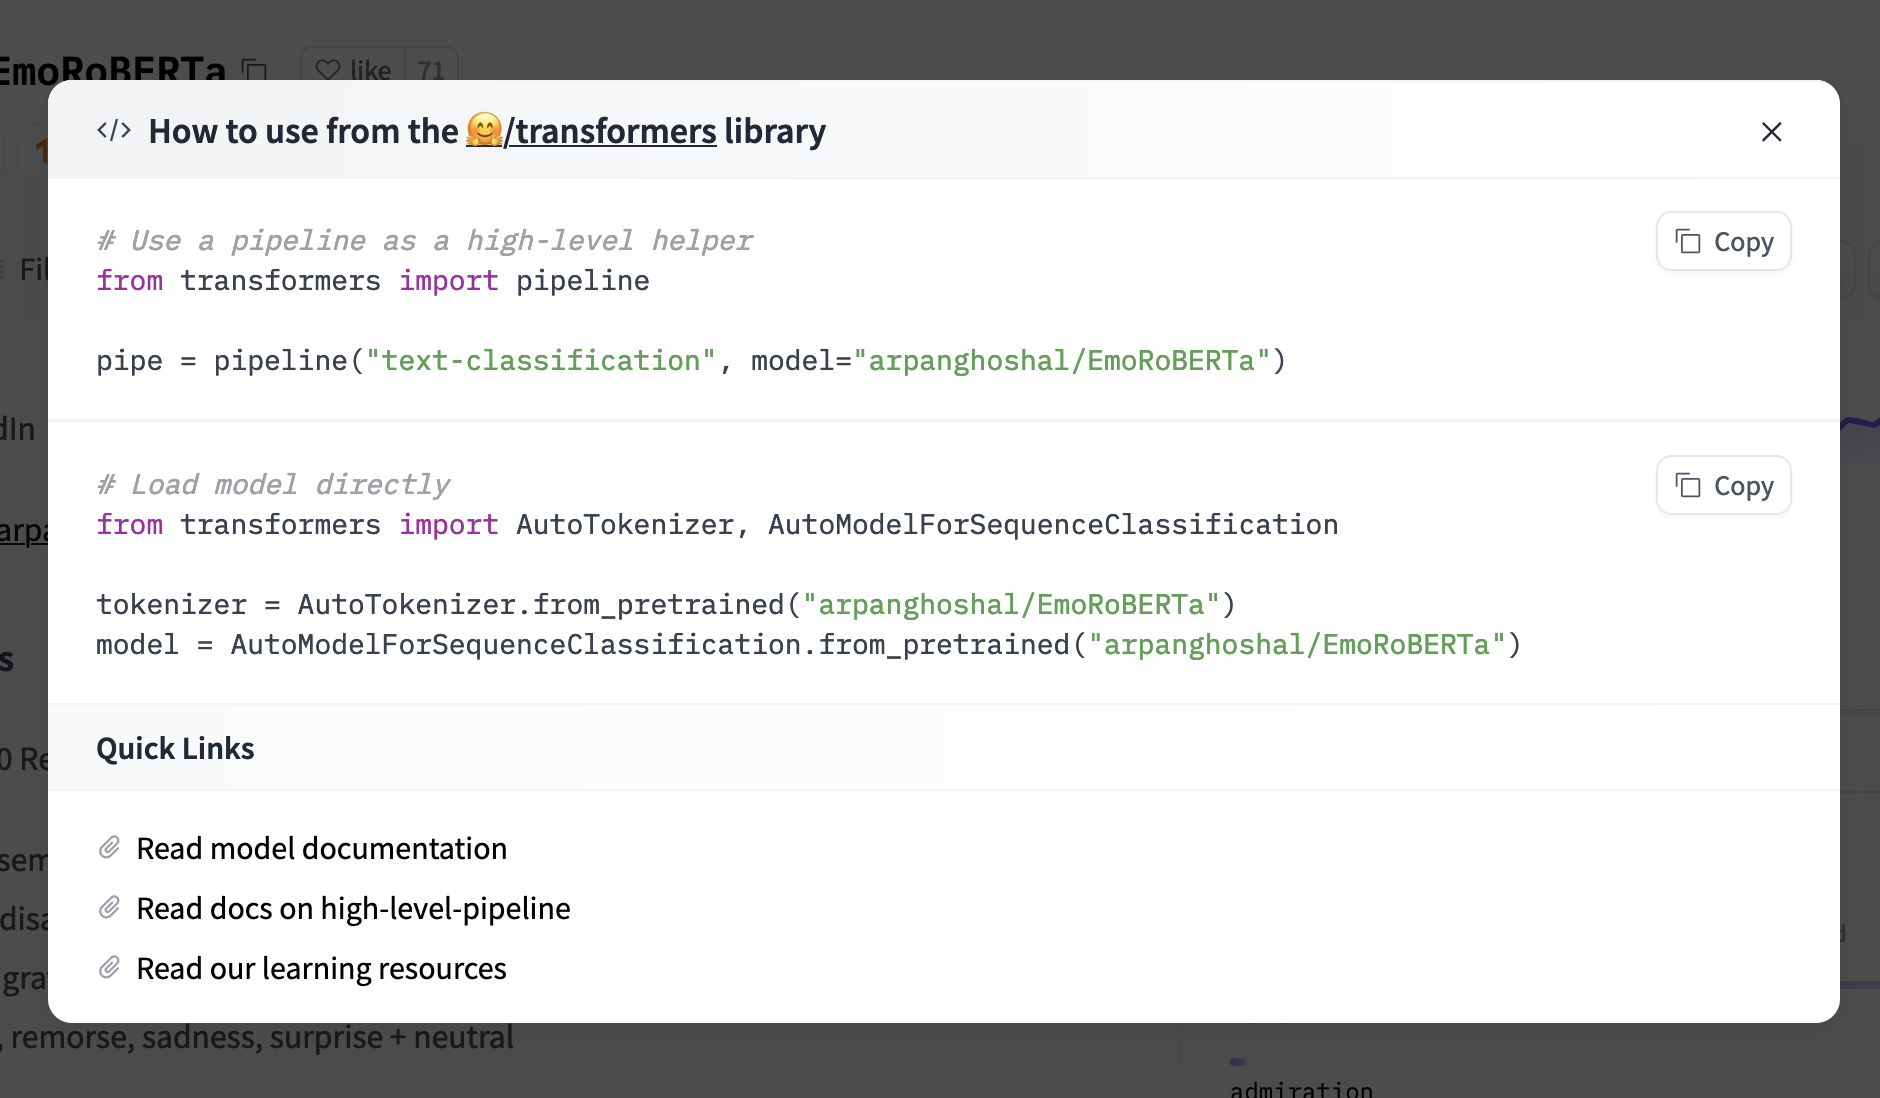

In [12]:
from transformers import pipeline

pipe = pipeline("text-classification", model="arpanghoshal/EmoRoBERTa")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [13]:
pipe(text)

[{'label': 'annoyance', 'score': 0.790020763874054}]

In [14]:
text = """The talk Daniel is giving is super bad. I'm so happy I didn't pay for this"""

In [15]:
pipe(text)

[{'label': 'annoyance', 'score': 0.790020763874054}]

In [16]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained('mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis')
model = AutoModelForSequenceClassification.from_pretrained('mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis')

In [17]:
inputs = tokenizer(text, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

In [18]:
predicted_class_id = logits.argmax().item()

model.config.id2label[predicted_class_id]

'negative'

In [19]:
from PIL import Image

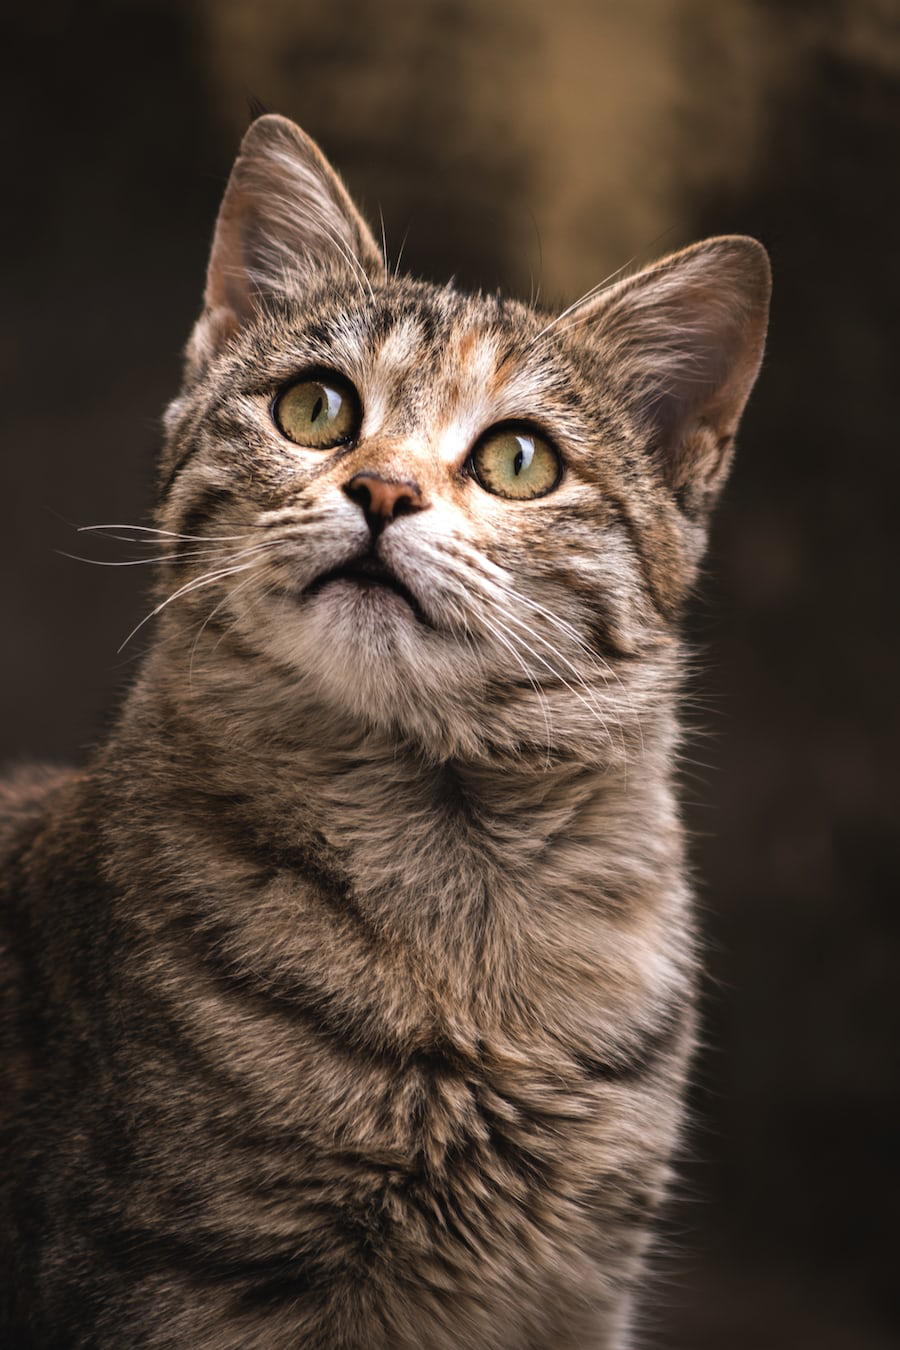

In [20]:
cat = Image.open('image.jpg')
cat

In [21]:
classifier = pipeline('zero-shot-image-classification')

No model was supplied, defaulted to openai/clip-vit-base-patch32 and revision f4881ba (https://huggingface.co/openai/clip-vit-base-patch32).
Using a pipeline without specifying a model name and revision in production is not recommended.


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [22]:
classifier(cat, candidate_labels=["dog", "cat","rabbit"])

[{'score': 0.9765204787254333, 'label': 'cat'},
 {'score': 0.016776280477643013, 'label': 'rabbit'},
 {'score': 0.006703261751681566, 'label': 'dog'}]

## Creating a UI in Python using Gradio

Gradio can be used to create UIs in Python. Gradio allows you to define inpupt and output components and pass these to a Python function.

i.e. inputs = text box, outputs = DataFrame

From this you can create a user interface without having to touch a line of HTML or JavaScript.


In [24]:
pipe = pipeline("automatic-speech-recognition", model="openai/whisper-base")

In [25]:
import gradio as gr

def transcribe(audio):
    text = pipe(audio)["text"]
    return text

gr.Interface(
    fn=transcribe,
    inputs=gr.Audio(source="microphone", type="filepath"),
    outputs="text").launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://af550272c4b5f04d40.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


We can quickly deploy these demos using Hugging Face Spaces.

## Bonus: training your own models

In [ ]:
from datasets import load_dataset

In [ ]:
ds = load_dataset('imdb')

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [ ]:
from datasets import load_dataset

In [ ]:
ds = load_dataset('biglam/cultural_heritage_metadata_accuracy')

Generating train split:   0%|          | 0/100821 [00:00<?, ? examples/s]

Dataset cultural_heritage_metadata_accuracy downloaded and prepared to /root/.cache/huggingface/datasets/biglam___cultural_heritage_metadata_accuracy/default/1.1.0/1ff8da2dbd32ead423527b6c51d138b880edddcd366201c1c8769c28789a81b1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['metadata_text', 'label', 'source'],
        num_rows: 100821
    })
})

In [ ]:
ds['train'][0]

{'metadata_text': 'Figure:putto.Oggetti:ghirlanda di fiori',
 'label': 0,
 'source': 'OpereArteVisiva'}

In [ ]:
ds.map(lambda x: {"lower": x['metadata_text'].lower()})

Map:   0%|          | 0/100821 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['metadata_text', 'label', 'source', 'lower'],
        num_rows: 100821
    })
})

In [ ]:
ds = ds.map(lambda x: {"lower": x['metadata_text'].lower()},num_proc=4)
ds

Map (num_proc=4):   0%|          | 0/100821 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['metadata_text', 'label', 'source', 'lower'],
        num_rows: 100821
    })
})

In [ ]:
ds = ds['train'].train_test_split(0.3)

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['metadata_text', 'label', 'source', 'lower'],
        num_rows: 70574
    })
    test: Dataset({
        features: ['metadata_text', 'label', 'source', 'lower'],
        num_rows: 30247
    })
})

In [ ]:
ds['train'].features

{'metadata_text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['Low_Quality', 'High_Quality'], id=None),
 'source': Value(dtype='string', id=None),
 'lower': Value(dtype='string', id=None)}

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer

https://huggingface.co/models?pipeline_tag=text-classification&language=it&sort=trending

In [ ]:
model_check_point = "xlm-roberta-base"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_check_point)

In [ ]:
tokenizer

XLMRobertaTokenizerFast(name_or_path='xlm-roberta-base', vocab_size=250002, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)}, clean_up_tokenization_spaces=True)

In [ ]:
text = "Come on, Barbie, let's go party"

In [ ]:
tokens = tokenizer.encode(text)
tokens

[0, 10592, 98, 4, 85805, 4, 2633, 25, 7, 738, 19085, 2]

In [ ]:
tokenizer.batch_decode(tokens)

['<s>',
 'Come',
 'on',
 ',',
 'Barbie',
 ',',
 'let',
 "'",
 's',
 'go',
 'party',
 '</s>']

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["metadata_text"], truncation=True)

ds = ds.map(preprocess_function, batched=True, batch_size=256, num_proc=2)


Map (num_proc=2):   0%|          | 0/70574 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/30247 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['metadata_text', 'label', 'source', 'lower', 'input_ids', 'attention_mask'],
        num_rows: 70574
    })
    test: Dataset({
        features: ['metadata_text', 'label', 'source', 'lower', 'input_ids', 'attention_mask'],
        num_rows: 30247
    })
})

In [ ]:
import evaluate
accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
id2label = dict(enumerate(ds['train'].features['label'].names))
id2label

{0: 'Low_Quality', 1: 'High_Quality'}

In [ ]:
label2id = {v:k for k,v in id2label.items()}
label2id

{'Low_Quality': 0, 'High_Quality': 1}

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    model_check_point, num_labels=len(label2id), id2label=id2label, label2id=label2id
)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from huggingface_hub import notebook_login

In [ ]:
notebook_login()

In [ ]:
training_args = TrainingArguments(
    output_dir="demo",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    fp16=True,
    push_to_hub=True,
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds["train"],
    eval_dataset=ds["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()